In [16]:
# Initial imports
# INSTALL PIP
# pip install yfinance

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import yfinance as yf
import datetime
from datetime import date
import hvplot.pandas
import numpy as np


%matplotlib inline

## Part 1 - Collect Stock Data

In [17]:
# The Stocks we'll use for this project
stock_list = ['FB', 'AAPL', 'GOOGL', 'AMZN', 'NFLX', 'SPY']

In [18]:
# set timeframe
startdate = datetime.datetime(2020,1,1)
enddate = date.today().strftime('%Y-%m-%d')

In [19]:
# Grab Data
Facebook = yf.Ticker("FB")
Apple = yf.Ticker("AAPL")
Netflix = yf.Ticker("NFLX")
Amazon = yf.Ticker("AMZN")
Google = yf.Ticker("GOOGL")
SP500 = yf.Ticker("SPY")

In [20]:
# define stock_list

stock_df = yf.download(
    "AMZN FB GOOGL NFLX AAPL SPY",
    start = startdate,
    end = enddate,
    group_by = "ticker"
)

stock_df.tail()


[*********************100%***********************]  6 of 6 completed


GOOGL                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2022-05-04  2340.629883  2457.090088  2302.320068  2445.219971  2445.219971   
2022-05-05  2404.080078  2420.780029  2300.110107  2330.110107  2330.110107   
2022-05-06  2303.689941  2351.429932  2280.310059  2314.929932  2314.929932   
2022-05-09  2265.000000  2301.540039  2240.010010  2250.219971  2250.219971   
2022-05-10  2310.149902  2325.000000  2258.010010  2287.899902  2287.899902   

                             FB                                      ...  \
             Volume        Open        High         Low       Close  ...   
Date                                                                 ...   
2022-05-04  2495800  210.649994  224.300003  206.960007  223.410004  ...   
2022-05-05  2292000  218.740005  220.169998  206.160004  208.279999  ...   
2022-05-06  1983000  207.339996  209.380005  201.020004  203.770004  ...   
2022-05-09  2040100  199.839996  202.570007  195.580002  196.210007  ...   
2022-05-10  1995000  199.509995  202.960007  194.190002  197.649994  ...   

                  AAPL                                        AMZN  \
                   Low       Close   Adj Close     Volume     Open   
Date                                                                 
2022-05-04  159.259995  166.020004  165.776428  108256500  2472.00   
2022-05-05  154.949997  156.770004  156.540009  130525300  2460.00   
2022-05-06  154.179993  157.279999  157.279999  116055700  2297.00   
2022-05-09  151.490005  152.059998  152.059998  131577900  2226.25   
2022-05-10  152.929993  154.509995  154.509995  115366700  2225.00   

                                                                         
                   High          Low        Close    Adj Close   Volume  
Date                                                                     
2022-05-04  2520.000000  2383.659912  2518.570068  2518.570068  5537300  
2022-05-05  2469.979980  2301.449951  2328.139893  2328.139893  7219600  
2022-05-06  2381.010010  2261.629883  2295.449951  2295.449951  6206700  
2022-05-09  2280.000000  2159.139893  2175.780029  2175.780029  6406200  
2022-05-10  2252.850098  2143.419922  2177.179932  2177.179932  5271700  

[5 rows x 36 columns]

In [6]:
# define each stock
fb_df = stock_df["FB"]
aapl_df = stock_df["AAPL"]
amzn_df = stock_df["AMZN"]
nflx_df = stock_df["NFLX"]
googl_df = stock_df["GOOGL"]
spy_df = stock_df["SPY"]

In [7]:
# Historical view of the closing price for each stock
closing_df = stock_df.iloc[:,[3,9,15,21,27,33]]

closing_df.tail()

,FB,GOOGL,AMZN,AAPL,NFLX,SPY
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2022-05-04,223.410004,2445.219971,2518.570068,166.020004,204.009995,429.059998
2022-05-05,208.279999,2330.110107,2328.139893,156.770004,188.320007,413.809998
2022-05-06,203.770004,2314.929932,2295.449951,157.279999,180.970001,411.339996
2022-05-09,196.210007,2250.219971,2175.780029,152.059998,173.100006,398.170013
2022-05-10,197.649994,2287.899902,2177.179932,154.509995,177.660004,399.089996


<AxesSubplot:xlabel='Date'>

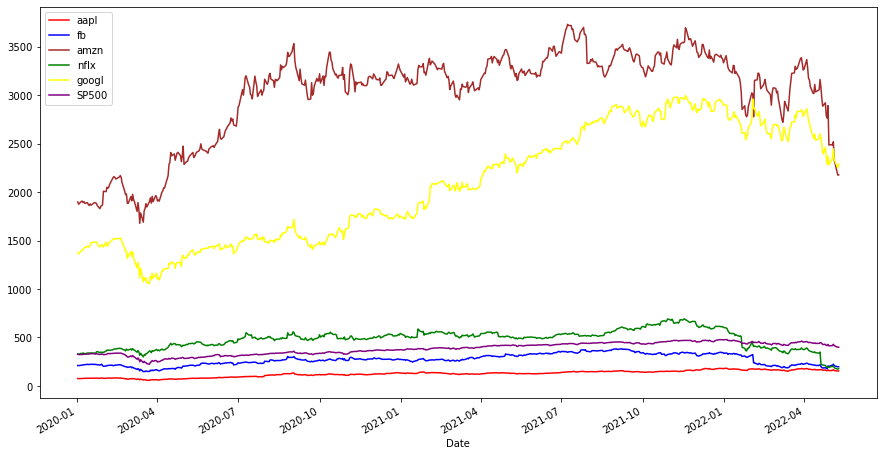

In [8]:
# Plot view of the closing price for each stock
aapl_df['Close'].plot(legend = True, figsize=(15,8), color = "Red", label="aapl")
fb_df['Close'].plot(legend = True, figsize=(15,8), color = "Blue", label="fb")
amzn_df['Close'].plot(legend = True, figsize=(15,8), color = "Brown", label="amzn")
nflx_df['Close'].plot(legend = True, figsize=(15,8), color = "Green", label="nflx") 
googl_df['Close'].plot(legend = True, figsize=(15,8), color = "Yellow", label="googl")
spy_df['Close'].plot(legend = True, figsize=(15,8), color = "Purple", label="SP500")

<AxesSubplot:xlabel='Date'>

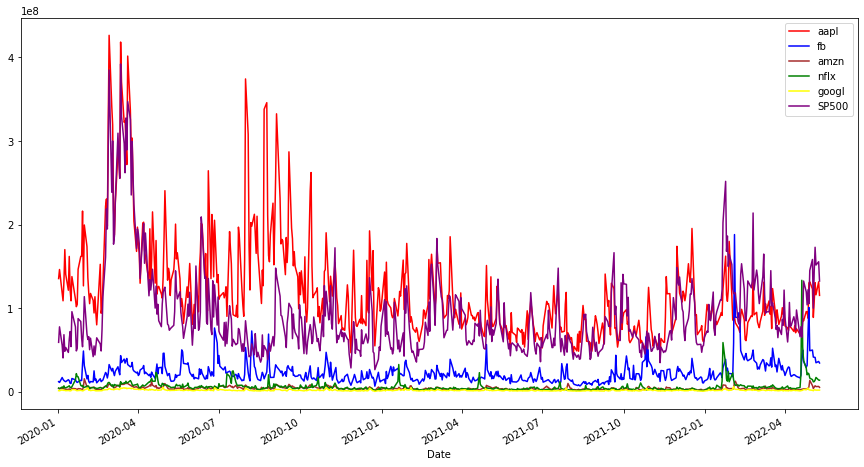

In [9]:
# Plot view of the total volume of each stock traded each day
aapl_df['Volume'].plot(legend = True, figsize=(15,8), color = "Red", label="aapl")
fb_df['Volume'].plot(legend = True, figsize=(15,8), color = "Blue", label="fb")
amzn_df['Volume'].plot(legend = True, figsize=(15,8), color = "Brown", label="amzn")
nflx_df['Volume'].plot(legend = True, figsize=(15,8), color = "Green", label="nflx") 
googl_df['Volume'].plot(legend = True, figsize=(15,8), color = "Yellow", label="googl")
spy_df['Volume'].plot(legend = True, figsize=(15,8), color = "Purple", label="SP500")

In [10]:
# Prepare for the analysis by converting the closing price to daily returns
# Drop any rows with all missing values
# Review the last five rows of the daily returns DataFrame.
closing_df.dropna()
daily_returns = closing_df.pct_change()
daily_returns.tail()


,FB,GOOGL,AMZN,AAPL,NFLX,SPY
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2022-05-04,0.053672,0.041991,0.013481,0.041008,0.020713,0.030453
2022-05-05,-0.067723,-0.047075,-0.075610,-0.055716,-0.076908,-0.035543
2022-05-06,-0.021654,-0.006515,-0.014041,0.003253,-0.039029,-0.005969
2022-05-09,-0.037101,-0.027953,-0.052134,-0.033189,-0.043488,-0.032017
2022-05-10,0.007339,0.016745,0.000643,0.016112,0.026343,0.002311


In [11]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.tail()


,FB,GOOGL,AMZN,AAPL,NFLX,SPY
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2022-05-04,1.064973,1.786553,1.326953,2.211020,0.618568,1.320713
2022-05-05,0.992850,1.702451,1.226622,2.087831,0.570995,1.273771
2022-05-06,0.971351,1.691359,1.209398,2.094623,0.548710,1.266168
2022-05-09,0.935313,1.644080,1.146348,2.025104,0.524848,1.225629
2022-05-10,0.942177,1.671610,1.147086,2.057733,0.538674,1.228461


<AxesSubplot:title={'center':'Cumulative returns'}, xlabel='Date'>

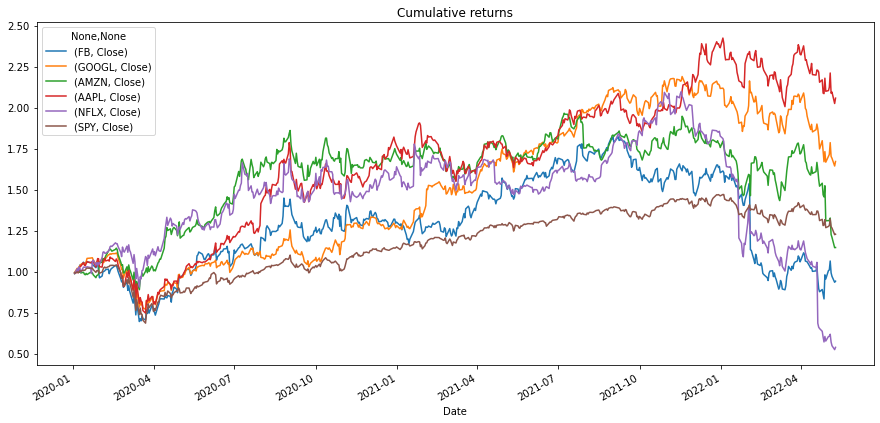

In [12]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns.plot(figsize=(15,7), title="Cumulative returns")


**Question** Which stock has better performance in 2022?
    
**Answer** Based on the cumulative line plot, AAPL has the best performance and outperform SP500 in 2022. Netflix has performance below SP500 and occured a huge drop in April 2022.

## Part 2 - RISK ANALYZATION

In [13]:
# Calculate the annual avg return value for each stock

annual_avg_returns = daily_returns.mean() * 252
annual_avg_returns.tail()

GOOGL  Close    0.272972
AMZN   Close    0.123709
AAPL   Close    0.374566
NFLX   Close   -0.128327
SPY    Close    0.119408
dtype: float64

In [14]:
# Calculate and sort the standard deviation for all stocks and the S&P 500

annualized_std = closing_df.std() * np.sqrt(252)
sharpe_ratios = annual_avg_returns / annualized_std


<AxesSubplot:title={'center':'Sharpe Ratios'}>

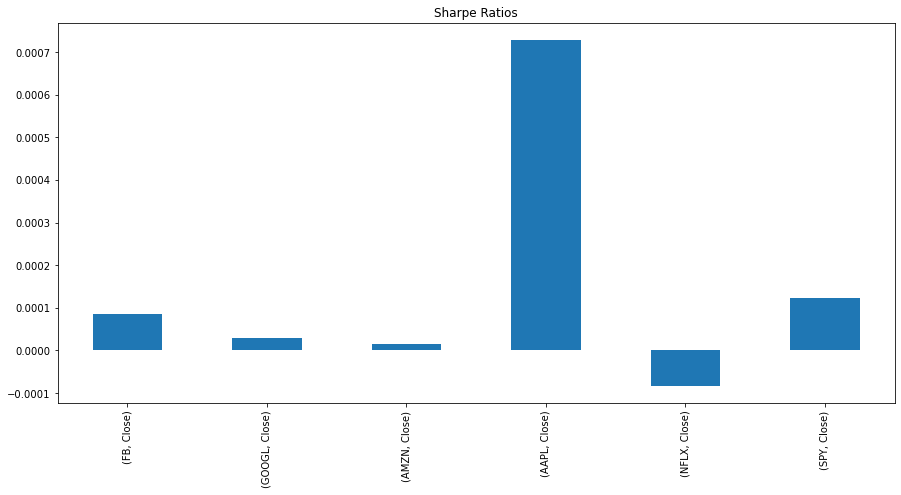

In [15]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.plot(
    kind="bar",
    title="Sharpe Ratios",
    figsize=(15,7)
)


**Question** Which of the stock offers the best risk-return profile? Which offers the worst?
    
**Answer** Based on the sharpe ratios bar plot, Apple is offers the best risk-return profile and Netflix offers the worst risk-return profile.